<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/Ex_loc_iloc_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE: Ações B3 NYC**

A base de dados a seguir traz valores de fechamento, % de valorização diária (%) e volume negociado (V) de vários ativos de 2019 a 2025.

  - `BVSP`, Índice Bovespa
  - `PETR4.SA`,
  - `VALE3.SA`,
  - `BRL=X`, Cotação do Dólar
  - `ITUB3.SA`,
  - `BTC-USD`, BitCoin US

Valores monetários são em moeda corrente. Valores ausentes indicam ausência de pregão/cotação, mas não há necessidade de qualquer tratamento aqui. Após entender os dados, crie os scripts necessários para responder as seguintes perguntas.

[Data](https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/stocks_2019_2025.csv)





In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/stocks_2019_2025.csv')
df.head()

,Date,BRL=X,BTC-USD,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X %,BTC-USD %,ITUB3.SA %,PETR4.SA %,VALE3.SA %,^BVSP %,BRL=X V,BTC-USD V,ITUB3.SA V,PETR4.SA V,VALE3.SA V,^BVSP V
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4324200990,NaN,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,20.093735,7.466959,30.699385,91012.0,-0.000026,0.025989,NaN,NaN,NaN,NaN,0.0,5244856836,1074590.0,104534800.0,17319600.0,5615400.0
2,2019-01-03,3.7863,3836.741211,20.276070,7.650064,29.443529,91564.0,-0.024124,-0.027050,0.009074,0.024522,-0.040908,0.006065,0.0,4530215219,311300.0,95206400.0,30120000.0,6066200.0
3,2019-01-04,3.7551,3857.717529,19.936563,7.671789,31.360359,91841.0,-0.008240,0.005467,-0.016744,0.002840,0.065102,0.003025,0.0,4847965467,370040.0,72119800.0,43360100.0,5322100.0
4,2019-01-05,NaN,3845.194580,NaN,NaN,NaN,NaN,0.000000,-0.003246,0.000000,0.000000,0.000000,0.000000,NaN,5137609824,NaN,NaN,NaN,NaN


# Q1.

Os dados do mês de abril de 2020 do índice bovespa foram atualizados de modo errado e encontram-se 10% maior do que o valor correto. Corrija esses valores. Em seguida apresente o novo valor de soma de todos os valores do índice na base.

Dica:
```
df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01')]
```

In [3]:
print(df['^BVSP'].sum())

df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01')]['^BVSP'] = df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01')]['^BVSP'] / 1.1

print(df['^BVSP'].sum())

172683282.0
172683282.0


<ipython-input-3-bdef98a556ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01')]['^BVSP'] = df[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01')]['^BVSP'] / 1.1


In [ ]:
print(df['^BVSP'].sum())

df.loc[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01'), '^BVSP'] = df.loc[(df['Date'] >= '2020-04-01') & (df['Date'] < '2020-05-01'), '^BVSP'] / 1.1

print(df['^BVSP'].sum())



172683282.0
172542211.54545456


# Q2.

Para efetuar uma análise tomamos a resolução de substituir os valores ausentes do real pela média dos últimos três valores anteriores (dias anteriores). Realize essa alteração na base. Em seguida apresente o novo valor de soma de todas as cotações do real na base.

In [ ]:
print(df['BRL=X'].sum())
print(df['BRL=X'].isnull().sum())

for i in range(3, len(df)):
    if pd.isna(df.loc[i,'BRL=X']):
        df.loc[i,'BRL=X'] = np.mean(df.loc[i-3:i,'BRL=X'])

print(df['BRL=X'].sum())
print(df['BRL=X'].isnull().sum())

8150.016347885132
650
11421.5086755782
0


In [ ]:
print(df['BRL=X'].sum())
print(df['BRL=X'].isnull().sum())

for idx in df[ df['BRL=X'].isnull() ].index:
    df.loc[idx,'BRL=X'] = np.mean(df.loc[idx-3:idx,'BRL=X'])

print(df['BRL=X'].sum())
print(df['BRL=X'].isnull().sum())

11421.5086755782
0
11421.5086755782
0


# Q3.

Crie os valores da série média móvel de 21 dias do valor dos ativos da bolsa brasileira (valores nulos podem ser ignorados na média). Em seguida apresente o novo valor de soma de todas essas cotações na base.

In [ ]:
for col in ['ITUB3.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']:
  df[col+'_Med21'] = np.nan
  for i in range(21, len(df)):
     df.loc[i,col+'_Med21'] = np.mean(df.loc[i-21:i,col])

display(df.head(3))
display(df.tail(3))

print(df[['ITUB3.SA_Med21', 'PETR4.SA_Med21', 'VALE3.SA_Med21', '^BVSP_Med21']].sum().sum())

,Date,BRL=X,BTC-USD,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X %,BTC-USD %,ITUB3.SA %,...,BRL=X V,BTC-USD V,ITUB3.SA V,PETR4.SA V,VALE3.SA V,^BVSP V,ITUB3.SA_Med21,PETR4.SA_Med21,VALE3.SA_Med21,^BVSP_Med21
0,2019-01-01,3.8800,3843.520020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,3.8799,3943.409424,20.093735,7.466959,30.699385,91012.0,-0.000026,0.025989,NaN,...,0.0,5244856836,1074590.0,104534800.0,17319600.0,5615400.0,NaN,NaN,NaN,NaN
2,2019-01-03,3.7863,3836.741211,20.276070,7.650064,29.443529,91564.0,-0.024124,-0.027050,0.009074,...,0.0,4530215219,311300.0,95206400.0,30120000.0,6066200.0,NaN,NaN,NaN,NaN


,Date,BRL=X,BTC-USD,ITUB3.SA,PETR4.SA,VALE3.SA,^BVSP,BRL=X %,BTC-USD %,ITUB3.SA %,...,BRL=X V,BTC-USD V,ITUB3.SA V,PETR4.SA V,VALE3.SA V,^BVSP V,ITUB3.SA_Med21,PETR4.SA_Med21,VALE3.SA_Med21,^BVSP_Med21
2266,2025-03-16,5.799311,82579.6875,NaN,NaN,NaN,NaN,0.000000,-0.020908,0.000000,...,NaN,21330270174,NaN,NaN,NaN,NaN,26.463002,35.602307,54.437962,124744.000000
2267,2025-03-17,5.740600,84075.6875,28.281818,36.160000,57.099998,130834.0,-0.009985,0.018116,0.021339,...,0.0,25092785558,1087350.0,31175900.0,23191800.0,11063200.0,26.592917,35.642142,54.628108,125179.000000
2268,2025-03-18,5.678069,82718.5000,28.450001,36.189999,57.520000,131475.0,-0.010893,-0.016142,0.005947,...,0.0,24095774594,695200.0,15086400.0,18165300.0,10992400.0,26.759331,35.504285,54.774876,125612.857143


251471111.15381467


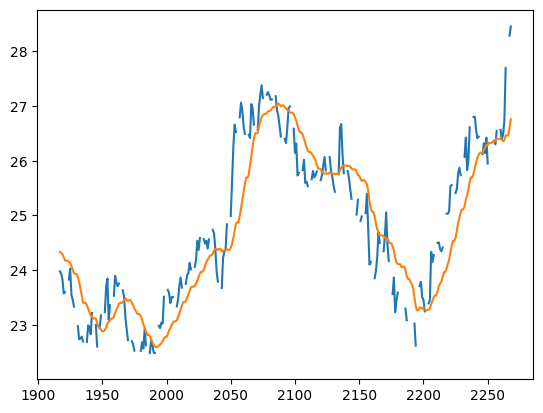

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[(df['Date'] >= '2024-04-01')]['ITUB3.SA'])
plt.plot(df[(df['Date'] >= '2024-04-01')]['ITUB3.SA_Med21'])
plt.show()